In [367]:
# imports of external packages to use in our code
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import colors
from Random import RandomDist

# default seed
seed = 5555

# class instance of our Random class using seed
random = RandomDist(seed)

# defalut number of samples per measurement 
Nsamples = 100  

# default number of measurements per experiment
Nmeas = 100  

# default number of experiments
Nexp = 1000

# alpha value
a = np.linspace(0, 1, Nexp)

# fixed beta
b = 2.0   

# fixed Mass fraction in the calculation of Delta_cr
M = 10 

# output file defaults (fixed)
doOutputFile = True # False #



In [368]:
# Calculate Delta critical value and get probability
def Delta_cr_prob(a, b, Nsamples):
    ''' Hill parameter calculation with two or more orbiting planets orbit our sun.
        Seperate Hill calculation into two portions - A as semi-major axis fraction sampled from beta distribution
        Mass fraction is a fixed unitless value in our simution. 
        returns Delta_cr (fraction of the orbital separation and planets’ mutual Hill radius RH)
        (e..g. Chambers et al. 1996): > 2*sqr(3) => stable
    '''
    delta_cr = []
    prob = []
    for a in a:
        # for given alpha sample A from beta distribution 
        A = random.Beta(a,b, Nsamples)    
        # calculate delta_cr: Samples of delta_cr calculated from A
        dcr = 2*A*M
    
        count = 0
        i = 0
        while i in range(Nsamples):
            cr = 2*np.sqrt(3)
            if dcr[i] > cr:
                count = count +1
            i = i+1
            
        # return probability of being stable given delta_cr in each samples per experiment 
        prob_sample = count/ Nsamples
        prob.append(prob_sample)
    
    return prob

OutputFileName = 'out_t.txt'

# simulate data from Bernoulli distribution for each experiment

# return probability of each experiment 
probs = Delta_cr_prob(a,b, Nsamples)
#print(probs)

if doOutputFile:
    outfile = open(OutputFileName, 'w')    
    #print(probs)
    for p in probs:
        for m in range(0, Nmeas):
            outfile.write(str(random.Bernoulli(p)) + " ")
        outfile.write(" \n")
        
    outfile.close()
    
else:
    for p in probs:
        for m in range(0, Nmeas):
            print(random.Bernoulli(p) , end=' ')
        print(" \n")
    print("  ")


#### extract Pstable for each simulated experiment
#### Plot histogram of Pstable vs range of alpha

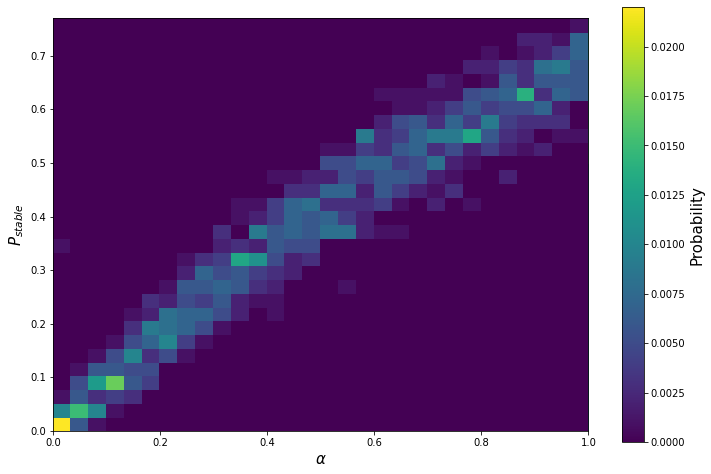

In [369]:
# 2d histogram of Pstable and different range of alpha
# create a 2d histogram where each bin of the histogram is coloured based on the percentage of successes in that bin
#(i.e. # of successes in bin divided by total points in bin)
a = np.linspace(0, 1, Nexp)
#print(a)
#print(probs)
plt.figure(figsize=(12,8))
counts = plt.hist2d(a, probs,bins =[30,30])
h = counts[0]/np.sum(counts[0])

im = plt.imshow(h)
cbar = plt.colorbar(im)
cbar.set_label('Probability', fontsize = 15)
plt.ylabel('$P_{stable}$', fontsize = 15)
plt.xlabel('$\\alpha$ ',fontsize = 15)
plt.show()


### Analysis of simulated data 

In this simulation, each experiment will contain Nmea independent bernoulli trails, each have probability of success (stable) as $p_{stable}$; The likelihood for $p_{stable}$ based on X is defined as the joint probability distribution of 

$L(p;x)\approx f(x;p)=\prod\limits_{i=1}^n f(x_i;p)=\prod\limits_{i=1}^n p^x(1-p)^{1-x}$

Differentiating the $\log L(p ; x)$

$LL(p;x) = \prod\limits_{i=1}^n \log p^{x_{i}}(1-p)^{1-x_{i}}
         = \prod\limits_{i=1}^n x_{i} (\log p) + (1-x_{i})\log(1-p)
         = Y\log p +(n-Y)\log(1-p)$ where $Y = \sum\limits_{i=1}^n x_i $

To find the value which maximizes a function that is to find the first derivative of the function and set it equal to 0. 


However, in our simulation, $P_{stable}$ for each trail is calculated numerically from samples from beta distribution of different value of $\alpha$, thus we would want to relate $\alpha$ numerically to $P(P_{stable};\alpha)$ which can be observed from histogram of $P_{stable}$

##### Define likelihood function!
$L(p;x)\approx f(x;p)=\prod\limits_{i=1}^n f(x_i;p)=\prod\limits_{i=1}^n p^x(1-p)^{1-x}  * P(P_{stable}|\alpha ) $

Differentiating the $\log L(p ; x)$

$LL(p;x) = \prod\limits_{i=1}^n \log p^{x_{i}}(1-p)^{1-x_{i}} * P(P_{stable}|\alpha )
         = \prod\limits_{i=1}^n x_{i} (\log p) + (1-x_{i})\log(1-p) + \log(P(P_{stable}|\alpha ))
         = Y\log p +(n-Y)\log(1-p) + \log(P(P_{stable}|\alpha))$ 
         
 where $Y = \sum\limits_{i=1}^n x_i $
         
         
##### Setting the derivative to zero shows that this function achieves a maximum at $\hat{p}=\sum\limits_{i=1}^n x_i/n$. Since $\sum\limits_{i=1}^n x_i$ is the total number of successes observed in the n trials,  is the observed proportion of successes in the n trials.

In [370]:
# Load the Pstable outputfile as Input  
data_stb = np.loadtxt('out_t.txt')